In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
my_m = tf.keras.models.load_model('models/umodelltwo.h5')

In [53]:
def preprocess_image(pth):
    train_images=tf.data.Dataset.list_files(pth,shuffle=False)
    train_images = train_images.map(load_image)
    train_images = train_images.map(lambda x: tf.image.resize(x, (128,128)))
    train_images = train_images.map(lambda x: x/255)
    return train_images

In [153]:
im1=preprocess_image('test/image-16.jpg')

1/1 [==============================] - 0s 225ms/step


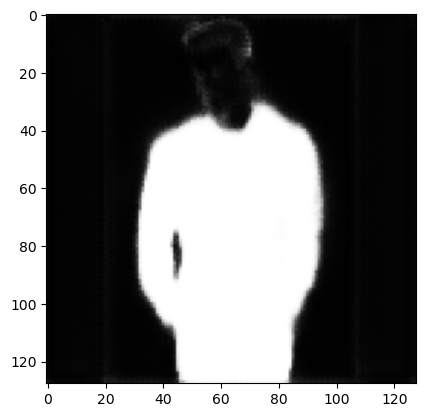

In [164]:
x = im1.take(1)
x = x.batch(1)
pred = my_m.predict(x)
mask = np.reshape(pred, (128, 128, 1))
plt.imshow(mask,cmap='gray')


In [155]:
_, binary_image = cv2.threshold(mask*225, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.convertScaleAbs(binary_image)

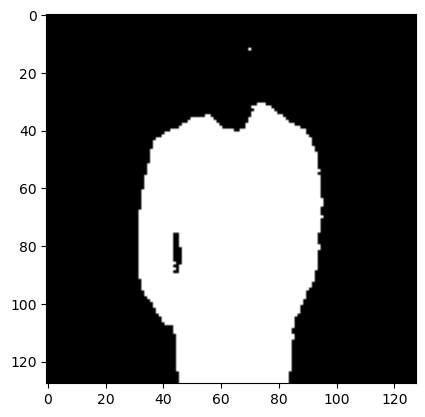

In [156]:
plt.imshow(binary_image,cmap='gray')

In [157]:
my_img=cv2.imread('test/image-16.jpg')

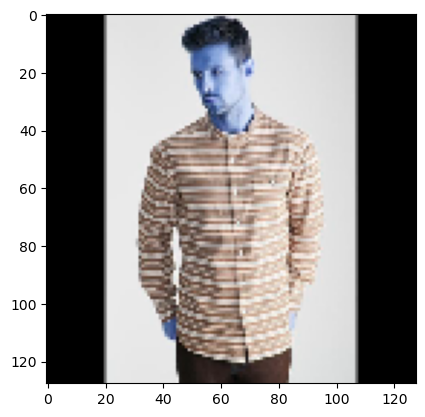

In [158]:
my_img=cv2.resize(my_img,(128,128))
plt.imshow(my_img)

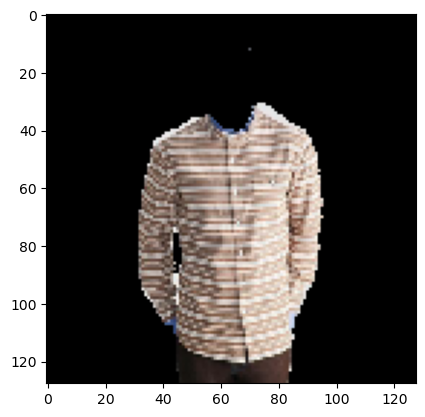

In [159]:
new_image_masked = cv2.bitwise_and(my_img, my_img, mask=binary_image)
plt.imshow(new_image_masked)

In [160]:
inverse_mask = cv2.bitwise_not(binary_image)

In [163]:
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()


while True:
    ret, frame = cap.read()  # ret is a boolean indicating success, frame is the current frame

    # If reading was successful, display the frame
    if ret:
        background_image=frame
        background_image=cv2.resize(background_image,(128,128))
        background = cv2.bitwise_and(background_image, background_image, mask=inverse_mask)
        final_image = cv2.add(new_image_masked, background)
        final_image=cv2.resize(final_image,(5000,2500))
        final_image = cv2.flip(final_image, 1)
        cv2.imshow('Video', final_image) 
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()